##DATA VISULIZATION LAB:  6). Lab Exercise

In [ ]:
#Import Libraries:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt

1. Create a list of 10 numbers, write a function that returns their mean, median, and
variance.

In [ ]:
# list of 10 numbers
nums = [5, 8, 12, 20, 7, 14, 9, 15, 10, 18]

def describe_numbers(numbers):
    mean_val = statistics.mean(numbers)
    median_val = statistics.median(numbers)
    variance_val = statistics.variance(numbers)
    return mean_val, median_val, variance_val

mean_val, median_val, variance_val = describe_numbers(nums)
print("Mean:", mean_val)
print("Median:", median_val)
print("Variance:", variance_val)

Mean: 11.8
Median: 11.0
Variance: 23.955555555555556


2. Load any dataset from Kaggle Datasets or use a sample CSV online. Perform:
- Display first 10 rows.
- Show column names.
- Plot histogram of one numerical column.


In [ ]:
df=pd.read_csv("/content/winequalityN.csv")

In [ ]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,NaN,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


##📊 Dataset Overview

###Total rows: 6,497

###Total columns: 13

- File type: Combined white and red wine records (column type shows wine color).

- Target/Label: quality (integer wine-quality score, typically 3–9).

- 🏷️ Column Details
###Column	Description	Data Type	Notes
- type	Wine color (white or red)	Categorical	Balanced mix of red & white wines
- fixed acidity	g/dm³ of tartaric acid	Float	Mostly 4–16 range
volatile acidity	g/dm³ of acetic acid	Float	Higher values can mean vinegar taste
- citric acid	g/dm³	Float	Natural acid, adds freshness
- residual sugar	g/dm³	Float	Ranges from dry to sweet
- chlorides	g/dm³ salt	Float	Low = better taste
- free sulfur dioxide	mg/dm³	Float	Preservative
- total sulfur dioxide	mg/dm³	Float	Must stay within legal limits
- density	g/cm³	Float	Related to sugar/alcohol
pH	Acidity level	Float	Usually 2.9–3.9
- sulphates	g/dm³	Float	Enhances flavor; one missing (NaN) value observed
- alcohol	% vol	Float	Typically 8–14%
- quality	Quality score (0–10)	Integer	Most wines rated 5–7
##⚠️ Data Quality

- Missing values: Very few, e.g., sulphates has a small number of NaN entries.

- Duplicates: Possible identical rows (e.g., row 3 & 4 are the same white wine sample).

- Outliers: Residual sugar and sulfur dioxide show long right tails (sweet wines or heavily sulfited ones).

In [ ]:
df.shape

(6497, 13)

In [ ]:
df.columns.tolist()

['type',
 'fixed acidity',
 'volatile acidity',
 'citric acid',
 'residual sugar',
 'chlorides',
 'free sulfur dioxide',
 'total sulfur dioxide',
 'density',
 'pH',
 'sulphates',
 'alcohol',
 'quality']

In [ ]:
#Check Missing Valiue:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6487 non-null   float64
 2   volatile acidity      6489 non-null   float64
 3   citric acid           6494 non-null   float64
 4   residual sugar        6495 non-null   float64
 5   chlorides             6495 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6488 non-null   float64
 10  sulphates             6493 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [ ]:
#Handle Missing Value for every col:
df['fixed acidity'] = df['fixed acidity'].fillna(df['fixed acidity'].median())
df['volatile acidity'] = df['volatile acidity'].fillna(df['volatile acidity'].median())
df['citric acid']    = df['citric acid'].fillna(df['citric acid'].median())
df['residual sugar'] = df['residual sugar'].fillna(df['residual sugar'].median())
df['chlorides']      = df['chlorides'].fillna(df['chlorides'].median())
df['pH']             = df['pH'].fillna(df['pH'].median())
df['sulphates']      = df['sulphates'].fillna(df['sulphates'].median())
df['type']           = df['type'].fillna(df['type'].mode()[0])

In [ ]:
#Test:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   type                  6497 non-null   object 
 1   fixed acidity         6497 non-null   float64
 2   volatile acidity      6497 non-null   float64
 3   citric acid           6497 non-null   float64
 4   residual sugar        6497 non-null   float64
 5   chlorides             6497 non-null   float64
 6   free sulfur dioxide   6497 non-null   float64
 7   total sulfur dioxide  6497 non-null   float64
 8   density               6497 non-null   float64
 9   pH                    6497 non-null   float64
 10  sulphates             6497 non-null   float64
 11  alcohol               6497 non-null   float64
 12  quality               6497 non-null   int64  
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


##📋 Data Quality Summary for the Wine Quality Dataset

- Total rows: 6,497
- Total columns: 13

###🟡 Columns with Missing (Null) Values
- Column	Non-Null Count	Total Missing	% Missing
- fixed acidity	6,487	10	0.15 %
- volatile acidity	6,489	8	0.12 %
- citric acid	6,494	3	0.05 %
- residual sugar	6,495	2	0.03 %
- chlorides	6,495	2	0.03 %
- pH	6,488	9	0.14 %
- sulphates	6,493	4	0.06 %

###All other columns have no missing values.

##🔎 Data Types Check
- Column	Dtype	Expected	Issue?
- type	object	Categorical (string)
- fixed acidity	float64	Numeric
- volatile acidity	float64	Numeric
- citric acid	float64	Numeric
- residual sugar	float64	Numeric
- chlorides	float64	Numeric
- free sulfur dioxide	float64	Numeric
- total sulfur dioxide	float64	Numeric
- density	float64	Numeric
- pH	float64	Numeric
- sulphates	float64	Numeric
- alcohol	float64	Numeric
- quality	int64	Integer (target)

In [ ]:
#Check Statistical Summary:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.216246,0.339630,0.318718,5.443574,0.056039,30.525319,115.744574,0.994697,3.218384,0.531202,10.491801,5.818378
std,1.295779,0.164557,0.145231,4.757585,0.035031,17.749400,56.521855,0.002999,0.160637,0.148769,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


##Outliers by Column

- fixed acidity
- Most wines fall between 6–8 g/dm³, but a few samples reach 15.9 g/dm³, which is unusually high.

- volatile acidity
Typical range is 0.2–0.4 g/dm³, yet the maximum goes up to 1.58 g/dm³, a strong outlier.

- citric acid
Usually 0.2–0.4 g/dm³, but some wines have as much as 1.66 g/dm³.

- residual sugar
Most wines contain 2–8 g/dm³, but a few sweet wines reach 65.8 g/dm³, far above normal.

- chlorides
Common range is 0.03–0.06 g/dm³, while some samples show 0.611 g/dm³, indicating very high salt content.

- free sulfur dioxide
Typically 17–41 mg/dm³, but there are values up to 289 mg/dm³.

- total sulfur dioxide
Normally 77–156 mg/dm³, with a maximum of 440 mg/dm³.

- density
Wine density is usually 0.992–0.997 g/cm³, yet one sample is as high as 1.038 g/cm³.

- pH
Normal wine pH is around 3.1–3.3, but values range from 2.72 (very acidic) to 4.01 (unusually basic).

- sulphates
Generally 0.4–0.6 g/dm³, but some reach 2.0 g/dm³.

- alcohol
Most wines are between 9.5–11.3 %, but a few go as high as 14.9 %.

In [ ]:
# IQR capping for all numeric columns with outliers
outlier_cols = [
    'fixed acidity', 'volatile acidity', 'citric acid',
    'residual sugar', 'chlorides', 'free sulfur dioxide',
    'total sulfur dioxide', 'density', 'pH',
    'sulphates', 'alcohol'
]

for col in outlier_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = df[col].clip(lower, upper)


In [ ]:
#Test:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.143112,0.332577,0.316258,5.408065,0.053235,30.339541,115.671926,0.994689,3.217521,0.526601,10.491624,5.818378
std,1.065349,0.144285,0.131776,4.613479,0.021285,16.904806,56.256191,0.002942,0.157747,0.131152,1.192136,0.873255
min,4.450000,0.080000,0.040000,0.600000,0.009000,1.000000,6.000000,0.987110,2.795000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,9.650000,0.655000,0.600000,17.550000,0.105500,77.000000,274.500000,1.003965,3.635000,0.855000,14.000000,9.000000


In [ ]:
print("Skewnes:",df['fixed acidity'].skew())
print("Kurtosis:",df['fixed acidity'].kurt())

Skewnes: 0.6584202923617274
Kurtosis: 0.1596581746818928


##Summary

- Skewness = 0.66 (positive) → Distribution is - - - slightly right-skewed; most values are around the center but a few higher values stretch the right tail.

- Kurtosis = 0.16 (near 0) → Shape is close to a normal curve, meaning no strong outliers or heavy tails are present.

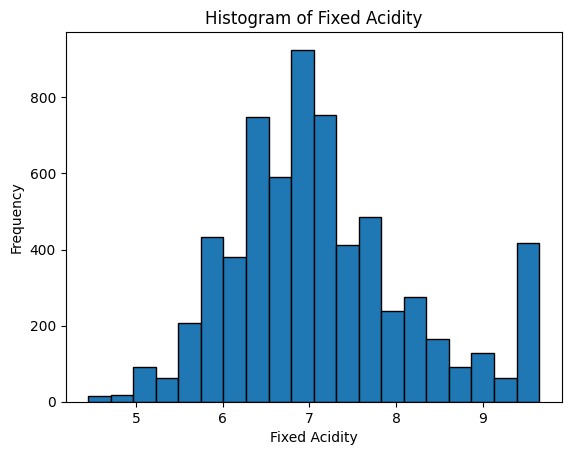

In [ ]:
plt.hist(df['fixed acidity'], bins=20, edgecolor='black')
plt.xlabel('Fixed Acidity')
plt.ylabel('Frequency')
plt.title('Histogram of Fixed Acidity')
plt.show()
